<a href="https://colab.research.google.com/github/SalihEkici/BigData_Project/blob/main/bigdata_bigcats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fastai - Transfer Learning

Step 1: Setup and Data Access

In [34]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [35]:
from fastbook import *

Step 2: Load the Dataset


In [36]:
path = Path("datasets/big-cats")

Step 3: Create a DataBlock


In [37]:
cats = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75))

Step 4: Load Data into DataLoaders


In [38]:
dls = cats.dataloaders(path)

Step 5: Visualize the Data


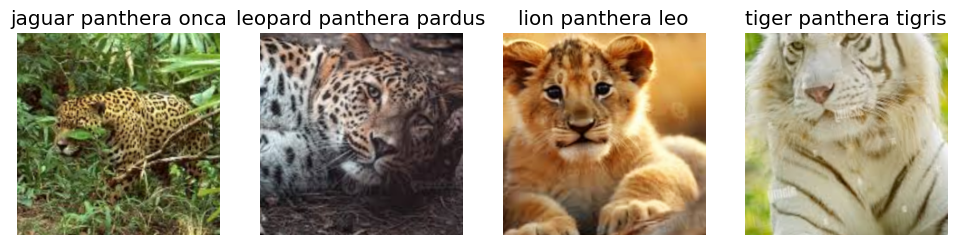

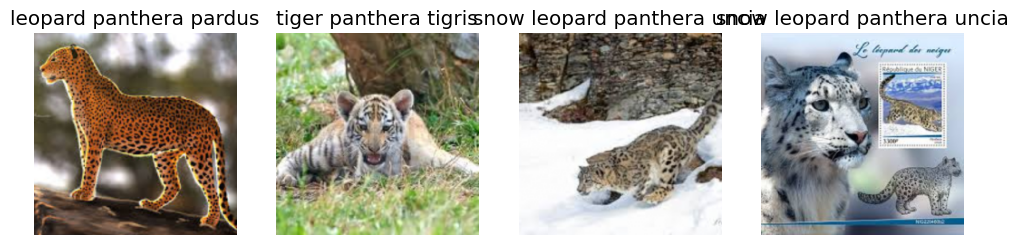

In [39]:
dls.train.show_batch(max_n=4, nrows=1)
dls.valid.show_batch(max_n=4, nrows=1)

Step 6: Choose a Pretrained Model


In [40]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

Step 7: Fine-Tuning the Model


In [41]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.613199,0.408809,0.131944,02:07


epoch,train_loss,valid_loss,error_rate,time
0,0.504247,0.329536,0.121528,02:48
1,0.412396,0.377517,0.111111,02:39
2,0.343109,0.351879,0.100694,02:34
3,0.275342,0.323795,0.104167,02:39


Step 9: Unfreeze and Train More (Optional)


epoch,train_loss,valid_loss,error_rate,time
0,0.162690,0.320354,0.100694,02:43
1,0.139616,0.321520,0.093750,02:40
2,0.136683,0.310161,0.086806,02:40
3,0.123795,0.320229,0.086806,02:42
4,0.109423,0.316631,0.086806,02:38
5,0.105334,0.317259,0.083333,02:41


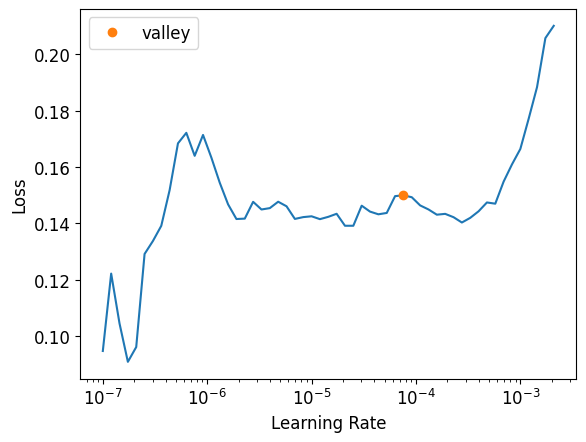

In [42]:
learn.unfreeze()
learn.lr_find()
learn.fit_one_cycle(6, lr_max=slice(1e-6,1e-4))

Step 10: Export the Model


In [43]:
learn.export('models/fastai_model.pkl')

# Alexnet

In [44]:
alexnet_model = vision_learner(dls, alexnet, metrics=error_rate)
alexnet_model.fine_tune(1)

c:\Users\Desktop\Documents\BigData_Project\bigdata\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,error_rate,time
0,1.968596,0.695170,0.274306,00:35


epoch,train_loss,valid_loss,error_rate,time
0,0.875628,0.594887,0.218750,00:46


In [45]:
learn.export('models/alexnet_model.pkl')

# VGG

> VGG stands for Visual Geometry Group; it is a standard deep Convolutional Neural Network (CNN) architecture with multiple layers.



In [47]:
vgg_model = vision_learner(dls, vgg16_bn, metrics=error_rate)  # or vgg19_bn
vgg_model.fine_tune(1)

c:\Users\Desktop\Documents\BigData_Project\bigdata\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,error_rate,time
0,1.662732,0.436945,0.166667,07:28


epoch,train_loss,valid_loss,error_rate,time
0,0.537576,0.316448,0.100694,09:41


In [48]:
learn.export('models/vgg_model.pkl')

# Resnet

In [49]:
resnet50_model = vision_learner(dls, resnet50, metrics=error_rate)
resnet50_model.fine_tune(1)

c:\Users\Desktop\Documents\BigData_Project\bigdata\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,error_rate,time
0,1.399866,0.560322,0.204861,03:57


epoch,train_loss,valid_loss,error_rate,time
0,0.557275,0.304895,0.111111,04:44


In [50]:
learn.export('models/resnet_model.pkl')

## Visualizations

### Fast AI

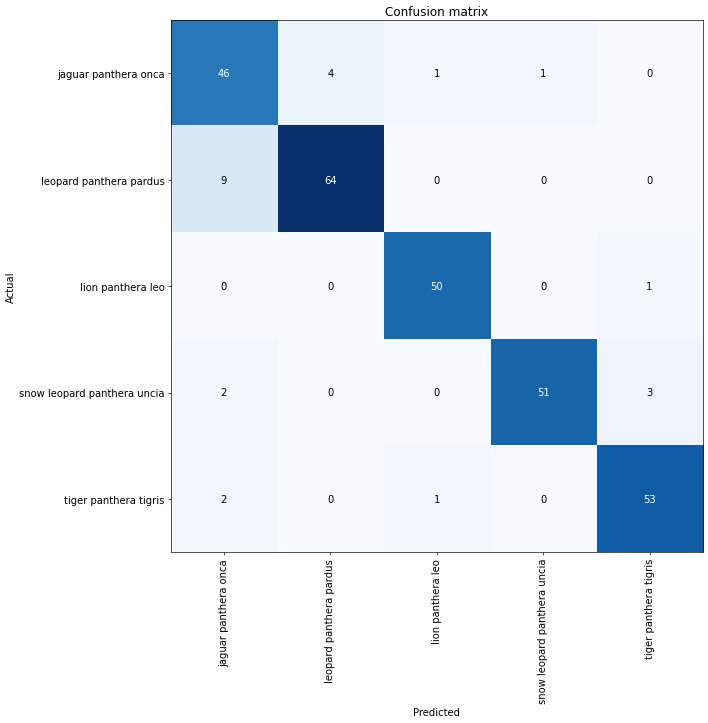

In [55]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

### AlexNet

c:\Users\Desktop\Documents\BigData_Project\bigdata\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


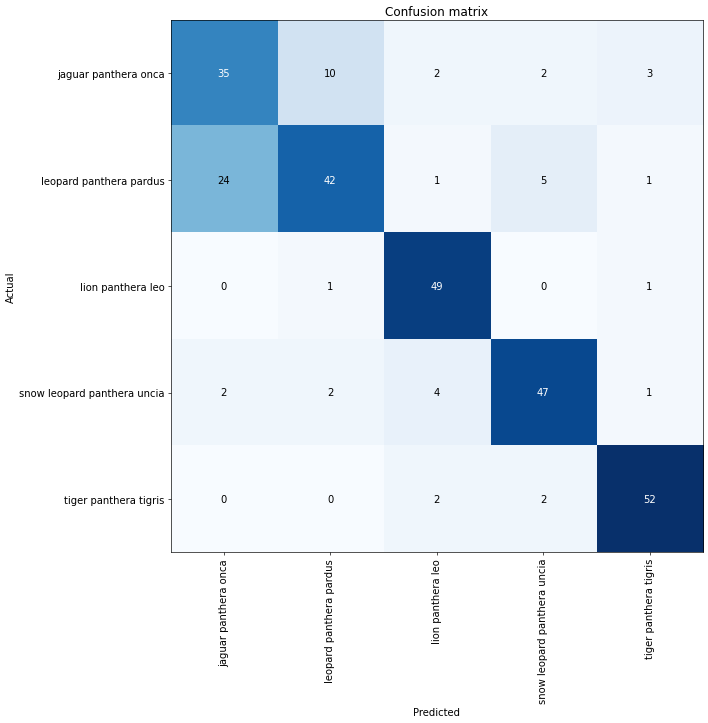

In [56]:
interp = ClassificationInterpretation.from_learner(alexnet_model)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

### VGG

c:\Users\Desktop\Documents\BigData_Project\bigdata\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


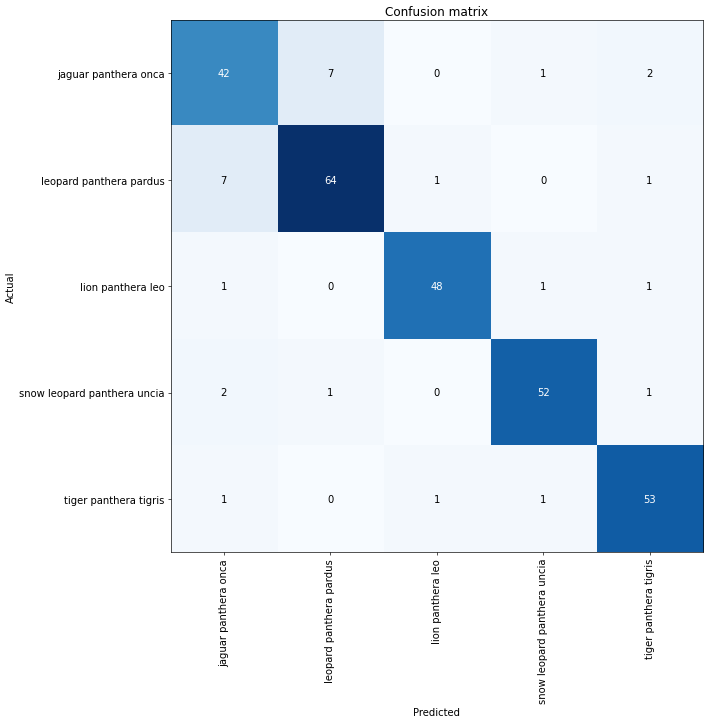

In [57]:
interp = ClassificationInterpretation.from_learner(vgg_model)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

### ResNet

c:\Users\Desktop\Documents\BigData_Project\bigdata\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


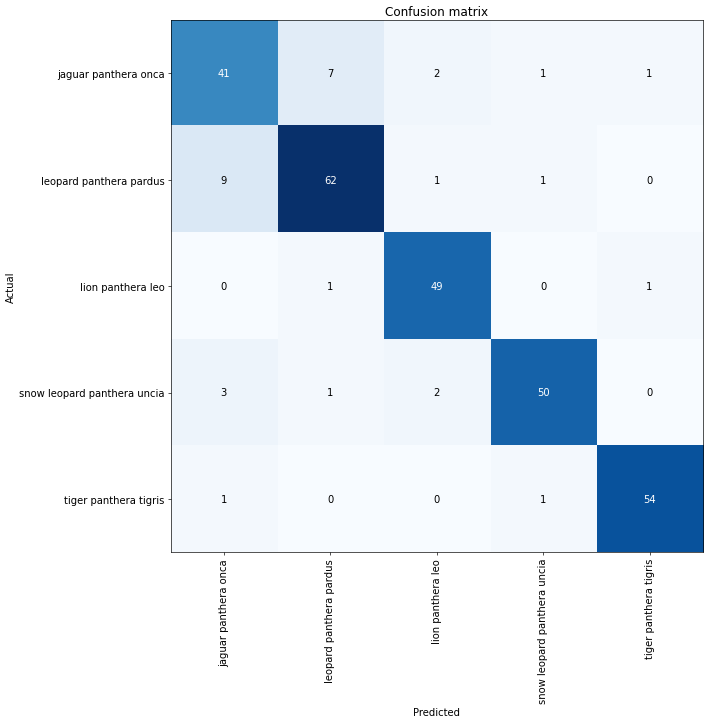

In [58]:
interp = ClassificationInterpretation.from_learner(resnet50_model)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

### Teachable Machine

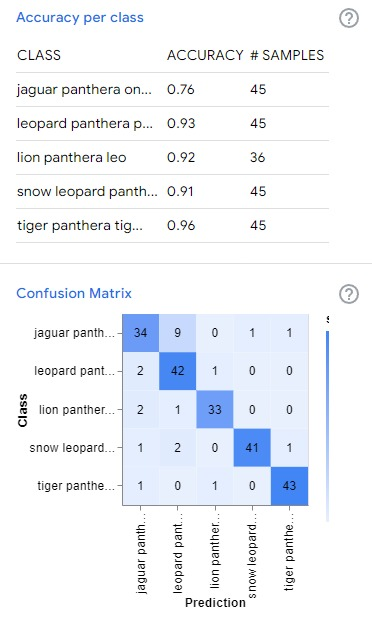

## ROC and AUC

c:\Users\Desktop\Documents\BigData_Project\bigdata\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


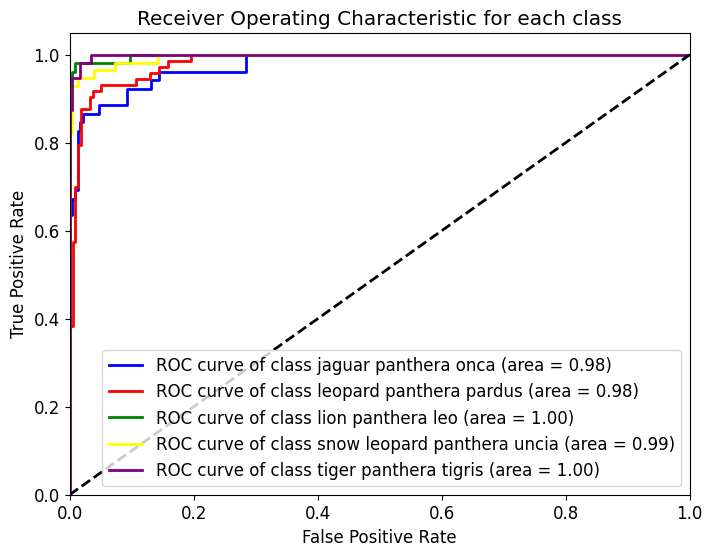

In [63]:
# Importing necessary libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Getting predictions and true labels from the learner
# 'preds' are the predicted probabilities for each class
# 'targets' are the true class labels
preds, targets = learn.get_preds()

# Number of classes in the dataset
# 'dls.vocab' contains the list of all classes
n_classes = len(dls.vocab)

# One-hot encode the targets
# This is necessary for multi-class ROC analysis
# Each column of 'targets_one_hot' corresponds to a class
targets_one_hot = label_binarize(targets, classes=range(n_classes))

# Dictionaries to store the false positive rates and true positive rates for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculating ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(targets_one_hot[:, i], preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves
plt.figure(figsize=(8, 6))
# Using a color cycle for different classes
colors = cycle(['blue', 'red', 'green', 'yellow', 'purple', 'orange', 'black'])

# Iterating over each class to plot its ROC curve
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {dls.vocab[i]} (area = {roc_auc[i]:0.2f})')

# Plotting the diagonal line representing random chance
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Setting limits for X and Y axis
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Adding labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')

# Adding a legend
plt.legend(loc="lower right")

# Displaying the plot
plt.show()

## Keras/TensorFlow Model

### Setting Up a Keras/TensorFlow Model with Transfer Learning

In [65]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)
base_model.trainable = False

# Add new layers for your specific task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(n_classes, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# First, train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

ModuleNotFoundError: No module named 'tensorflow'

### Preparing Your Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Assuming you have your data in 'train_dir' and 'test_dir'
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')


### Training the Model

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size)


### Fine-Tuning

In [ ]:
# Unfreeze some layers of the base model
for layer in model.layers[:unfreeze_layers]:
    layer.trainable = True

# Recompile the model (necessary after making modifications to the layers)
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=further_epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size)
